
Image Transformation Menu:
1. Image Negative
2. Log Transformation
3. Gamma Correction
4. Contrast Stretching
5. Gray-Level Slicing
6. Bit-Plane Slicing
7. Exit
Select an option (1-7): 1
Please upload a grayscale image 


Saving download.jpg to download (17).jpg


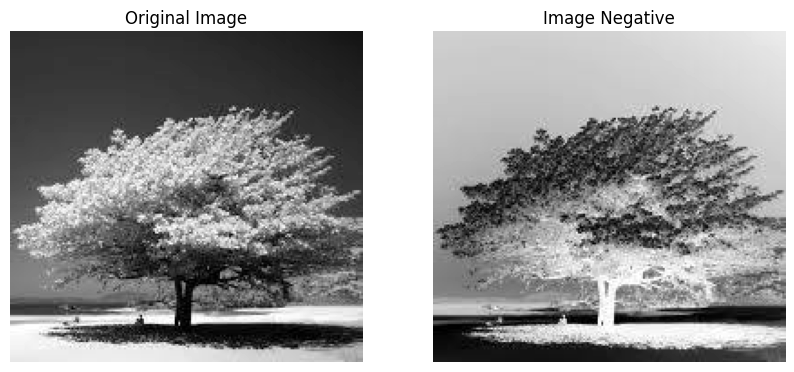


Image Transformation Menu:
1. Image Negative
2. Log Transformation
3. Gamma Correction
4. Contrast Stretching
5. Gray-Level Slicing
6. Bit-Plane Slicing
7. Exit
Select an option (1-7): 7
Exiting ;)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import cv2
from google.colab import files

# A2

def img_negative(img):
    img_float = img_as_float(img)
    negative_image = 1 - img_float
    return negative_image

def log_transformation(img, base=10):
    img_float = img_as_float(img)
    c = 1 / np.log(1 + img_float.max())
    log_img = c * np.log(1 + img_float)
    return log_img

def gamma_correction(img, gamma):
    img_float = img_as_float(img)
    gamma_image = np.power(img_float, gamma)
    return gamma_image

def contrast_stretching(image, min_out=0, max_out=1):
    min_in = np.min(image)
    max_in = np.max(image)
    stretched_image = (image - min_in) * ((max_out - min_out) / (max_in - min_in)) + min_out
    return stretched_image

def gray_level_slicing(image, min_val=0.5, max_val=0.7, preserve_others=False):
    sliced_image = np.zeros_like(image)
    sliced_image[(image >= min_val) & (image <= max_val)] = image[(image >= min_val) & (image <= max_val)]
    if preserve_others:
        sliced_image[image < min_val] = image[image < min_val]
        sliced_image[image > max_val] = image[image > max_val]
    return sliced_image

def bit_plane_slicing(image, bit_plane=4):
    image = (image * 255).astype(np.uint8)
    sliced_image = (image >> bit_plane) & 1
    return sliced_image

def display_images(original, transformed, transformation_name):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed, cmap='gray')
    plt.title(transformation_name)
    plt.axis('off')

    plt.show()

def upload_image():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
        return image
    else:
        print("No files were uploaded.")
        return None

def main():
    while True:
        print("\nImage Transformation Menu:")
        print("1. Image Negative")
        print("2. Log Transformation")
        print("3. Gamma Correction")
        print("4. Contrast Stretching")
        print("5. Gray-Level Slicing")
        print("6. Bit-Plane Slicing")
        print("7. Exit")

        choice = input("Select an option (1-7): ")

        if choice == '7':
            print("Exiting ;)")
            break

        print("Please upload a grayscale image ")
        image = upload_image()



        if choice == '1':
            result = img_negative(image)
            display_images(image, result, "Image Negative")
        elif choice == '2':
            base = float(input("Enter the base for log transformation : ") or 10)
            result = log_transformation(image, base)
            display_images(image, result, "Log Transformation")
        elif choice == '3':
            gamma = float(input("Enter the gamma value for correction  : ") or 2.2)
            result = gamma_correction(image, gamma)
            display_images(image, result, "Gamma Correction")
        elif choice == '4':
            min_out = float(input("Enter the minimum output level  : ") or 0)
            max_out = float(input("Enter the maximum output level  : ") or 1)
            result = contrast_stretching(image, min_out, max_out)
            display_images(image, result, "Contrast Stretching")
        elif choice == '5':
            min_val = float(input("Enter the minimum value to highlight  : ") or 0.5)
            max_val = float(input("Enter the maximum value to highlight  : ") or 0.7)
            preserve_others = input("Preserve other gray levels? (yes/no ): ").lower() == 'yes'
            result = gray_level_slicing(image, min_val, max_val, preserve_others)
            display_images(image, result, "Gray-Level Slicing")
        elif choice == '6':
            bit_plane = int(input("Enter the bit plane to extract (0-7 ): ") or 4)
            result = bit_plane_slicing(image, bit_plane)
            display_images(image, result, f"Bit-Plane Slicing (Plane {bit_plane})")
        else:
            print("Invalid choice. Please select a number between 1 and 7.")

if __name__ == "__main__":
    main()
